In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=ef5c38ad547a9ff5b3c044a5482da290e2f6a0de109200e7085611d09ef9b7be
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [3]:
import numpy as np
#import pandas as pd
import tensorflow as tf
import cv2
#import os
from imutils import paths
path = list(paths.list_images("../input/cat-and-dog/training_set/training_set"))
y_data = ['cats','dogs']

In [4]:
path[1]

'../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg'

In [5]:


X_data = []
Y_labels = []

for i in range(0,len(path)):
    label = path[i].split("/")[-2]
    if label not in y_data:
        continue
    else:
        image = cv2.imread(path[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (124,124))
        X_data.append(image)
        Y_labels.append(label)

In [6]:
x_array = np.array(X_data)
y_array = np.array(Y_labels)

In [7]:
x_array.shape

(8005, 124, 124, 3)

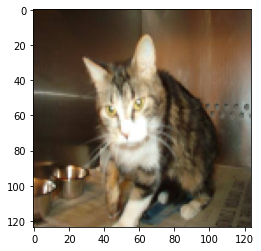

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_array[5000])

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
LE = LabelEncoder()
LE.fit(y_array)
Y_Encoded = LE.transform(y_array)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_array, Y_Encoded, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((6404, 124, 124, 3), (1601, 124, 124, 3), (6404,), (1601,))

In [11]:
x_train_norm = x_train/255.
x_test_norm = x_test/255.

In [12]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((124,124,3),input_shape=(124,124,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, 
                                 kernel_size=(3,3), 
                      
                                 activation='relu'))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

2022-01-02 10:40:24.541651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 10:40:24.635897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 10:40:24.636642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 10:40:24.638669: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=10,
          batch_size=32)

2022-01-02 10:40:27.480349: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.
2022-01-02 10:40:28.675929: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1181614848 exceeds 10% of free system memory.
2022-01-02 10:40:29.546511: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-02 10:40:30.980087: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


201/201 [==============================] - 12s 27ms/step - loss: 1.0859 - accuracy: 0.5607 - val_loss: 0.6601 - val_accuracy: 0.6227
Epoch 2/10
201/201 [==============================] - 5s 23ms/step - loss: 0.6108 - accuracy: 0.6691 - val_loss: 0.5829 - val_accuracy: 0.6933
Epoch 3/10
201/201 [==============================] - 5s 23ms/step - loss: 0.4600 - accuracy: 0.7869 - val_loss: 0.5734 - val_accuracy: 0.7233
Epoch 4/10
201/201 [==============================] - 5s 23ms/step - loss: 0.2334 - accuracy: 0.9077 - val_loss: 0.6463 - val_accuracy: 0.7177
Epoch 5/10
201/201 [==============================] - 5s 24ms/step - loss: 0.0864 - accuracy: 0.9724 - val_loss: 0.9616 - val_accuracy: 0.7114
Epoch 6/10
201/201 [==============================] - 5s 23ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 1.1621 - val_accuracy: 0.7083
Epoch 7/10
201/201 [==============================] - 5s 23ms/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 1.2491 - val_accuracy: 0.7102
Epoch 8/1